In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import builtins

In [5]:
def shaper(ar):
    newar = ar.reshape(ar.shape[0],-1).T
    return newar

def loader(data_path):
    data = np.load(data_path)
    trainX_orig,testX_orig,trainy_orig,testy_orig = train_test_split(data[:,:-1],data[:,-1])
    trainX = shaper(trainX_orig)
    trainy = shaper(trainy_orig)
    testX = shaper(testX_orig)
    testy = shaper(testy_orig)
    return trainX,trainy,testX,testy


In [6]:
import utils
trainX,trainy,testX,testy = utils.load_data("../Titanic/data.npy")

trainX shape: (7, 668)
testX shape: (7, 223)
trainy shape: (1, 668)
testy shape: (1, 223)


In [7]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0    
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -np.sum(Y*np.log(A) + (1-Y)*np.log(1 - A))/m
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = [] 
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w-learning_rate*dw
        b = b-learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 1 if A[0,i]>0.5 else 0
    assert(Y_prediction.shape == (1, m))    
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}    
    return d

In [8]:
d = model(trainX,trainy,testX,testy, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 74.55089820359281 %
test accuracy: 68.60986547085201 %


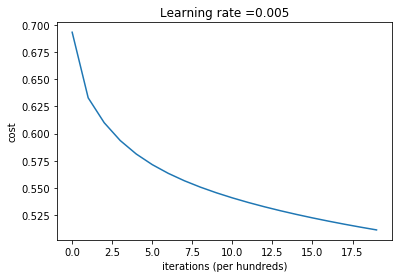

In [9]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 75.89820359281437 %
test accuracy: 69.50672645739911 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 70.95808383233532 %
test accuracy: 70.85201793721973 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 60.62874251497006 %
test accuracy: 64.57399103139014 %

-------------------------------------------------------



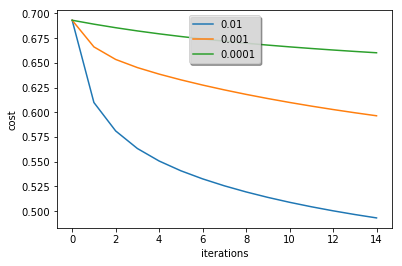

In [10]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(trainX,trainy,testX,testy, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()